<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backpropagation-Practice" data-toc-modified-id="Backpropagation-Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backpropagation Practice</a></span><ul class="toc-item"><li><span><a href="#Data-Science-Unit-4-Sprint-2-Assignment-2" data-toc-modified-id="Data-Science-Unit-4-Sprint-2-Assignment-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Data Science Unit 4 Sprint 2 Assignment 2</em></a></span></li><li><span><a href="#Try-building/training-a-more-complex-MLP-on-a-bigger-dataset." data-toc-modified-id="Try-building/training-a-more-complex-MLP-on-a-bigger-dataset.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Try building/training a more complex MLP on a bigger dataset.</a></span></li><li><span><a href="#Stretch-Goals:" data-toc-modified-id="Stretch-Goals:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stretch Goals:</a></span></li></ul></li></ul></div>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
##### Your Code Here #####

# create dataframe

import pandas as pd
import numpy as np

df = pd.DataFrame({
    'x1': [0,0,1,0,1,1,0],
    'x2': [0,1,0,1,0,1,0],
    'x3': [1,1,1,0,0,1,0],
    'y':  [0,1,1,1,1,0,0]
})

In [2]:
df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,0,0


In [10]:
# documentation on indexing 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
x = df.loc[:,'x1':'x3']
x

,x1,x2,x3
0,0,0,1
1,0,1,1
2,1,0,1
3,0,1,0
4,1,0,0
5,1,1,1
6,0,0,0


In [11]:
y = df['y']
y

0    0
1    1
2    1
3    1
4    1
5    0
6    0
Name: y, dtype: int64

In [12]:
# seeding numpy random to have same random numbers at all times
np.random.seed(812)

In [13]:
x.shape

(7, 3)

| Index | w1 | w2 | w3 | w4 |
|----|----|----|---|---|
Feature 1  | 0  | 0  | 1  | 0 |
Feature 2  | 0  | 1  | 1  | 1 |
Feature 3  | 1  | 0  | 1  | 1 |

W = weight

Number of inputs = number of rows for weight
Number of outputs/nodes = number of columns for weight

In [16]:
# building a neural  network class. 

class NeuralNetwork:
    
    def __init__(self):
        # set up the neural network architecture. 
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # initialize weights
        # the resulting weight needs to be 3 rows - input, and 
        # 4 columns - number of nodes. 
        # Every feature gets 4 weights
        # example of the weights is above
        #3 by 4
        self.weight1 = np.random.randn(self.inputs, self.hiddenNodes)
        #4 by 1
        self.weight2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
        
    # sigmoid function
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    # feed forward network
    def feed_forward(self, X):
        
        # weighted sum
        self.hidden_sum = np.dot(X, self.weight1)
        
        # activate the output from the hidden layer. 
        self.activated_hidden_output = self.sigmoid(self.hidden_sum)
        
        # second weighted sum
        self.output_sum = np.dot(self.activated_hidden_output, self.weight2)
        
        # active the final output from output layer
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    

In [17]:
nn = NeuralNetwork()

In [21]:
output = nn.feed_forward(x)

print('Output \n', output)
print('Actual output \n', y)

Output 
 [[0.5388686 ]
 [0.55352047]
 [0.40771131]
 [0.55447957]
 [0.3955229 ]
 [0.42425304]
 [0.53465072]]
Actual output 
 0    0
1    1
2    1
3    1
4    1
5    0
6    0
Name: y, dtype: int64


In [24]:
# making y into one dimensional array
y = [[i] for i in y ]

# calculating error
error = y - output
error

array([[-0.5388686 ],
       [ 0.44647953],
       [ 0.59228869],
       [ 0.44552043],
       [ 0.6044771 ],
       [-0.42425304],
       [-0.53465072]])

In [25]:
# adding back propagation to neural network to improve weights. 

# building a neural  network class. 

class NeuralNetwork:
    
    def __init__(self):
        # set up the neural network architecture. 
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # initialize weights
        # the resulting weight needs to be 3 rows - input, and 
        # 4 columns - number of nodes. 
        # Every feature gets 4 weights
        # example of the weights is above
        #3 by 4
        self.weight1 = np.random.randn(self.inputs, self.hiddenNodes)
        #4 by 1
        self.weight2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
        
    # sigmoid function
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    # feed forward network
    def feed_forward(self, X):
        
        # weighted sum
        self.hidden_sum = np.dot(X, self.weight1)
        
        # activate the output from the hidden layer. 
        self.activated_hidden_output = self.sigmoid(self.hidden_sum)
        
        # second weighted sum
        self.output_sum = np.dot(self.activated_hidden_output, self.weight2)
        
        # active the final output from output layer
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    # define sigmoid derivative
    def sigmoidPrime(self, x):
        # sigmoid of x
        sigmoid_x = self.sigmoid(x)
        # derivative of sigmoid
        der_sigmoid = sigmoid_x * (1-sigmoid_x)
        return der_sigmoid
    
    def propagation(self, X, y, o):
        """Back propagation using gradient descent"""
        
        # y  =  actual values
        # o = predicted values
        
        # output error
        self.output_error = y - o
        
        # apply derivative of sigmoid to error
        # the error multiplied by the derivative of the second weighted sum
        # second weighted sum is the final output before sigmoid/activation function
        # is applied to the final output. 
        self.output_delta = self.output_error * self.sigmoidPrime(self.output_sum)
        
        # what is the error in the second weights. 
        # second weights is the weight that fed into the final output
        self.weight2_error = self.output_delta.dot(self.weight2.T)
        
        # apply derivate of sigmoid to the first outputs from the hidden layer
        # now working on the layer directly above the final output layer
        # how much was the original weights that fed into this neural network off?
        # multiply the error in the weights that fed into the hidden layer by the 
        # output of the hidden layer prior to activation. 
        
        self.hidden_delta = self.weight2_error * self.sigmoidPrime(self.hidden_sum)
        
        # since is is a one hidden layer network, back propagation is done, now
        # just update the weights using this new informatiion
        
        # multiply the input by the new gradient
        self.weight1 += X.T.dot(self.hidden_delta)
        
        # multiply the activated output of the first hidden layer by the 
        # gradient calculated above. 
        self.weight2 += self.activated_hidden_output.T.dot(self.output_delta)
        
    # now implementing the back propagation functioin using a training function
    
    def train(self, X, y):
        
        # o = the output of the feed forward function
        o = self.feed_forward(X)
        # implement the backward propagation function during trainig. 
        self.propagation(X, y, o)
        

In [27]:
nn = NeuralNetwork()

nn.train(x, y)

In [29]:
# train the neural network with multiple epochs

# Train my 'net
nn = NeuralNetwork()

# Number of Epochs / Iterations
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', x)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(x)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(x)))))
    nn.train(x,y)
    

+---------EPOCH 1---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.38074774]
 [0.48938583]
 [0.30611975]
 [0.57244858]
 [0.37633517]
 [0.43185558]
 [0.46824731]]
Loss: 
 0.2663826122898049
+---------EPOCH 2---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.42171975]
 [0.53691614]
 [0.35397682]
 [0.60711331]
 [0.42010271]
 [0.49158726]
 [0.50060155]]
Loss: 
 0.2560772745167173
+---------EPOCH 3---------+
Input: 
    x1  x2  x3
0   0   0   1
1   0   1   1
2   1   0   1
3   0   1   0
4   1   0   0
5   1   1   1
6   0   0   0
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.44622573]
 [0.5652214 ]
 [0.38907335]
 [0.62803205]
 [0.45258107]
 [0.5321184 

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


Everything below was copied from week 2 of tensorflow course assignment notebook in the introduction to tensorflow folder.

How to find this notebook 

- Tensorflow
- Coursera Course
- Introduction to tensorflow
- Week 2
- Assignment

In [40]:
%%capture
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [41]:
print(tf.__version__)

2.2.0


In [42]:
# getting the dataset
mnist = tf.keras.datasets.mnist

# setting variables to extract datasets from the dataset. 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


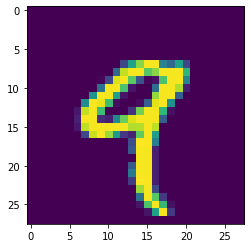

In [43]:
# getting an idea of what images are in our dataset. 
plt.imshow(train_images[4])

In [44]:
# finding out the values making up an image
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [45]:
# standardizing the values to 0's and 1's
train_images = train_images/255
test_images = test_images/255

In [46]:
# designing the model with neural networks
model = tf.keras.models.Sequential([keras.layers.Flatten(),
                                     keras.layers.Dense(128, activation=tf.nn.relu),
                                     keras.layers.Dense(10, activation=tf.nn.softmax)])




In [50]:
# creating a class that will cause our model to stop training when we reach 99% accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print('\nReached 99% accuracy so cancelling training')
      self.model.stop_training = True

In [51]:
# instatiating callback class. 
callback = myCallback()

In [52]:
# compiling the model and fitting the model to training dataset
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 10,
          callbacks = [callback])

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1135 - accuracy: 0.9664
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0757 - accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0559 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 6/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.0265 - accuracy: 0.9919
Reached 99% accuracy so cancelling training
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0264 - accuracy: 0.9919


In [53]:
# testing to see if our model works and if it can detect an image from a new
# untested dataset
classification = model.predict(test_images)

# testing to see if prediction works. 
print(classification[4])

[3.2120606e-06 1.0598881e-06 1.1565635e-06 6.1077352e-09 9.7347021e-01
 2.1343835e-07 3.6659872e-06 1.0435646e-06 2.1514838e-06 2.6517162e-02]


In [54]:
# verifying the classificatio i got above
print(test_labels[4])

4


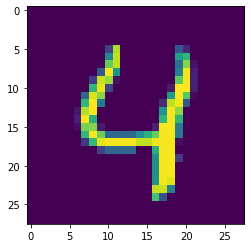

In [55]:
# verifying that test image 4 mathes the label above. 
plt.imshow(test_images[4])

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?